In [2]:
# 라이브러리 불러오기
import numpy as np  # 수치 계산을 위한 라이브러리
import pandas as pd  # 데이터 분석 및 처리 라이브러리
import matplotlib.pyplot as plt  # 그래프 및 시각화를 위한 라이브러리
import seaborn as sns
import seaborn.objects as so

# 머신러닝 관련 모듈
from sklearn import svm  # 서포트 벡터 머신(SVM) 모델 관련 모듈
from sklearn import metrics  # 평가 지표를 계산하기 위한 모듈
from sklearn import datasets  # 내장된 예제 데이터셋 로드
from sklearn.model_selection import train_test_split  # 데이터셋 분할 함수
from sklearn.svm import SVC  # SVM 분류기(Support Vector Classifier) 불러오기

# 결정 경계 시각화를 위한 라이브러리
from mlxtend.plotting import plot_decision_regions  # 결정 경계를 그려주는 함수

In [4]:
# iris 데이터 호출하기 (sns dataset에서 iris 데이터 호출)
iris = sns.load_dataset('iris')

# 'species' 열의 문자열 데이터를 정수로 매핑 (모델이 처리할 수 있도록 인코딩)
# 'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2
iris['species'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 독립변수와 종속변수 데이터셋을 구분
target_df = iris.iloc[0:,:-1]
label_df = iris['species']

In [7]:
# PCA 진행
from sklearn.decomposition import PCA

# 2개의 주성분으로 차원을 축소하도록 PCA 객체 생성
pca = PCA(n_components=2)

# PCA 학습을 위해 데이터에 맞게 모델 적합 (fit)
# (여기서는 target_df 데이터를 기반으로 주성분을 찾음)
pca.fit(target_df)

# 학습된 PCA 모델을 사용해 데이터 차원 축소 (transform)
target_pca = pca.transform(target_df)

# 차원 축소된 데이터를 데이터프레임으로 변환하고 열 이름을 설정
target_pca = pd.DataFrame(target_pca, columns=['X1', 'X2'])

# 상위 5개 행을 출력하여 변환된 데이터 확인
target_pca.head()

,X1,X2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [8]:
# 데이터 분할을 위해 train_test_split 메서드 사용
# target_pca: 입력 데이터, label_df: 정답 레이블
# 데이터셋을 60%는 테스트 세트로, 40%는 학습 세트로 분할 (test_size=0.6)
# random_state=10: 동일한 결과를 재현하도록 랜덤 시드 고정
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(target_pca, label_df, test_size=0.6, random_state=10)

# 주석 처리된 코드로 각 데이터 분할 결과의 shape을 확인
# X_train_1.shape
# X_test_1.shape
# y_train_1.shape
# y_test_1.shape

In [9]:
# C: 제약조건의 강도 설정
# C 값이 클수록 하드 마진(아웃라이어를 거의 허용하지 않음), 작을수록 소프트 마진(아웃라이어 허용 가능)
# Kernel 종류: poly(다항), rbf(방사 기저 함수), linear(선형) 설정

c_values = [0.01, 0.1, 1, 10]  # 테스트할 C 값들 목록
kernel_list = ['poly', 'rbf', 'linear']  # 테스트할 커널 종류 목록

# 정확도를 저장할 DataFrame 생성 (행: C 값, 열: 커널 종류)
accuracy = pd.DataFrame(0, index=c_values, columns=kernel_list)

# 각 C 값과 커널 종류에 대해 반복적으로 모델 훈련 및 평가
for c in c_values:
    for k in kernel_list:
        # SVM 모델 생성 (C 값과 커널 설정, 최대 반복 횟수는 10,000)
        model = svm.SVC(C=c, max_iter=10000, kernel=k)

        # 학습 데이터를 사용해 모델 훈련
        model.fit(X_train_1, y_train_1)

        # 테스트 데이터를 사용해 예측 수행
        predictions = model.predict(X_test_1)

        # 예측 결과와 실제 값 비교하여 정확도 계산
        score = metrics.accuracy_score(y_test_1, predictions)

        # 정확도를 DataFrame에 저장
        accuracy.loc[c, k] = score

# 모든 C 값과 커널에 대한 정확도 출력
accuracy

<ipython-input-9-4ae66d34ec43>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accuracy.loc[c, k] = score
<ipython-input-9-4ae66d34ec43>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3111111111111111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accuracy.loc[c, k] = score
<ipython-input-9-4ae66d34ec43>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6444444444444445' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accuracy.loc[c, k] = score


,poly,rbf,linear
0.01,0.633333,0.311111,0.644444
0.10,0.866667,0.833333,0.922222
1.00,0.955556,0.955556,0.966667
10.00,0.966667,0.966667,0.966667


In [10]:
# 데이터 분할을 위해 train_test_split 메서드 사용
# target_df: 특성 데이터(입력값), label_df: 정답 레이블(타겟값)
# test_size=0.6: 전체 데이터 중 60%를 테스트 데이터로 사용
# random_state=10: 동일한 데이터 분할을 위해 랜덤 시드 고정

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(target_df, label_df, test_size=0.6, random_state=10)

In [11]:
c_values = [0.01, 0.1, 1, 10]  # C 값 리스트 (제약 조건의 강도 조절)
kernel_list = ['poly', 'rbf', 'linear']  # 사용될 커널 종류 리스트

# 정확도를 저장할 데이터프레임 생성 (행: C 값, 열: 커널 종류)
accuracy_2 = pd.DataFrame(0, index=c_values, columns=kernel_list)

# 각 C 값과 커널 조합에 대해 SVM 모델 학습 및 평가
for c in c_values:  # C 값 순회
    for k in kernel_list:  # 커널 종류 순회

        # SVM 모델 생성 (C 값과 커널 종류 지정)
        model = svm.SVC(C=c, max_iter=10000, kernel=k)

        # 학습 데이터로 모델 훈련
        model.fit(X_train_2, y_train_2)

        # 테스트 데이터에 대한 예측 수행
        predictions = model.predict(X_test_2)

        # 예측 결과와 실제 값 비교하여 정확도 계산
        score = metrics.accuracy_score(y_test_2, predictions)

        # 해당 C 값과 커널에 대한 정확도를 데이터프레임에 저장
        accuracy_2.loc[c, k] = score

# 정확도 결과 출력
accuracy_2

<ipython-input-11-89763dde0a4a>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accuracy_2.loc[c, k] = score
<ipython-input-11-89763dde0a4a>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3111111111111111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accuracy_2.loc[c, k] = score
<ipython-input-11-89763dde0a4a>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6444444444444445' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accuracy_2.loc[c, k] = score


,poly,rbf,linear
0.01,0.900000,0.311111,0.644444
0.10,0.966667,0.644444,0.944444
1.00,0.955556,0.944444,0.966667
10.00,0.933333,0.966667,0.944444


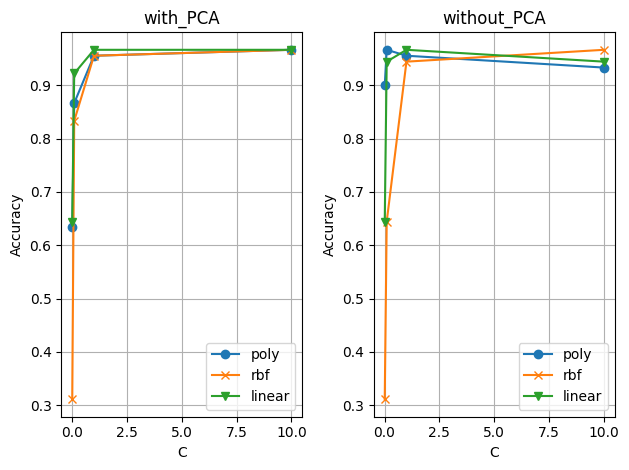

In [12]:
# 두 가지 경우(PCA 적용 여부)에 따른 정확도 시각화
plt.subplot(1, 2, 1)  # 첫 번째 서브플롯 생성 (1행, 2열 중 첫 번째)

# PCA 적용한 경우의 정확도 그래프
plt.plot(accuracy.index, 'poly', data=accuracy, label='poly', marker='o')   # 다항 커널
plt.plot(accuracy.index, 'rbf', data=accuracy, label='rbf', marker='x')     # RBF 커널
plt.plot(accuracy.index, 'linear', data=accuracy, label='linear', marker='v')  # 선형 커널

plt.legend()  # 범례 표시
plt.grid(True)  # 격자선 추가
plt.xlabel('C')  # x축 레이블 설정
plt.ylabel('Accuracy')  # y축 레이블 설정
plt.title("with_PCA")  # 그래프 제목 설정

plt.subplot(1, 2, 2)  # 두 번째 서브플롯 생성 (1행, 2열 중 두 번째)

# PCA 미적용한 경우의 정확도 그래프
plt.plot(accuracy_2.index, 'poly', data=accuracy_2, label='poly', marker='o')  # 다항 커널
plt.plot(accuracy_2.index, 'rbf', data=accuracy_2, label='rbf', marker='x')    # RBF 커널
plt.plot(accuracy_2.index, 'linear', data=accuracy_2, label='linear', marker='v')  # 선형 커널

plt.legend()  # 범례 표시
plt.grid(True)  # 격자선 추가
plt.xlabel('C')  # x축 레이블 설정
plt.ylabel('Accuracy')  # y축 레이블 설정
plt.title("without_PCA")  # 그래프 제목 설정

plt.tight_layout()  # 서브플롯 간격 자동 조정
plt.show()  # 그래프 표시

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


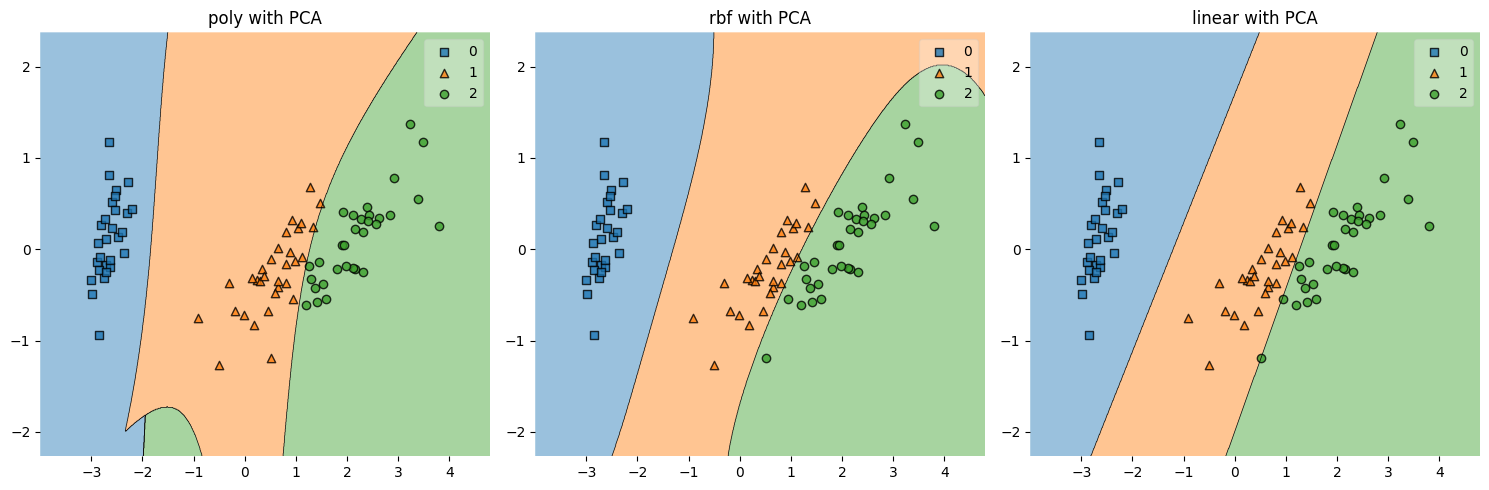

In [13]:
# 다양한 Kernel에 따른 SVM 모델의 시각화
kernel_list = ['poly', 'rbf', 'linear']  # 사용할 커널 목록

i = 1  # 서브플롯 인덱스 초기화

plt.figure(figsize=(15, 5))  # 전체 플롯의 크기 설정

# 각 커널에 대해 SVM 모델 학습 및 시각화
for k in kernel_list:
    # SVM 모델 생성 및 학습 (C=10, 최대 반복 10,000회)
    model = svm.SVC(C=10, max_iter=10000, kernel=k)
    model.fit(X_train_1, y_train_1)  # 훈련 데이터로 학습

    # 테스트 데이터 예측
    predictions = model.predict(X_test_1)
    predictions = pd.DataFrame(data=predictions, columns=['Species'])  # 예측 결과를 DataFrame으로 변환

    # 테스트 데이터와 예측 결과의 인덱스 초기화 및 결합
    X_test_1.reset_index(drop=True, inplace=True)
    predictions.reset_index(drop=True, inplace=True)
    df_pred = pd.concat([X_test_1, predictions], axis=1, ignore_index=True)  # 결합된 데이터프레임 생성
    df_pred.columns = ['X1', 'X2', 'Species']  # 컬럼명 설정

    # 서브플롯 생성 (1행 3열의 i번째 위치에 플롯)
    plt.subplot(1, 3, i)

    # 결정 경계 시각화
    plot_decision_regions(X=df_pred[['X1', 'X2']].values,
                          y=df_pred['Species'].values,
                          clf=model)

    plt.title("{0} with PCA".format(k))  # 그래프 제목 설정

    i = i + 1  # 다음 서브플롯 인덱스 증가

# 서브플롯 간격 조정
plt.tight_layout()

# 플롯 출력
plt.show()